In [1]:
from qiskit import *

## A gate that sets the grid 

In [2]:
q_grid = QuantumRegister(9, name='grid')

def set_bits(bits):
    x9 = QuantumCircuit(q_grid, name=bits)
    for pos, bit in enumerate(bits):
        if bit=='1':
            x9.x(pos)
    return x9.to_gate()

#### testing 

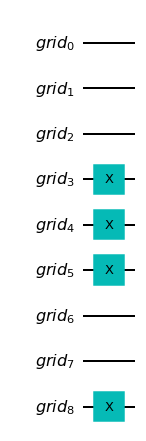

In [3]:
qc = QuantumCircuit(q_grid)
qc.append(set_bits('000111001'), q_grid)
qc.decompose().draw('mpl')

### A gate that sets the problem

Set a grid for each particular address

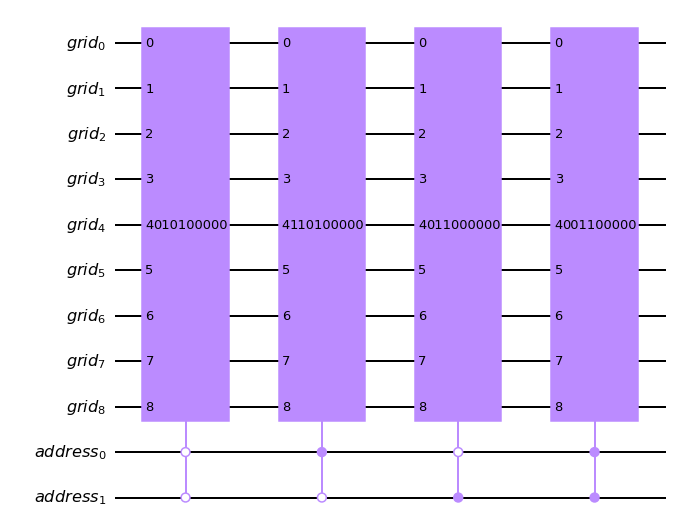

In [4]:
q_address = QuantumRegister(2, name='address')
problem = QuantumCircuit(q_grid, q_address)

problem_setting={
'00':'010100000',
'01':'110100000',
'10':'011000000',
'11':'001100000'
}

for address, bits in problem_setting.items():
    controlled_grid = set_bits(bits).control(2, ctrl_state=address)
    problem.append(controlled_grid, q_address[:]+q_grid[:])
problem.draw('mpl')

#### testing

Let's fetch the position `01`, that should return the grid `110100000`

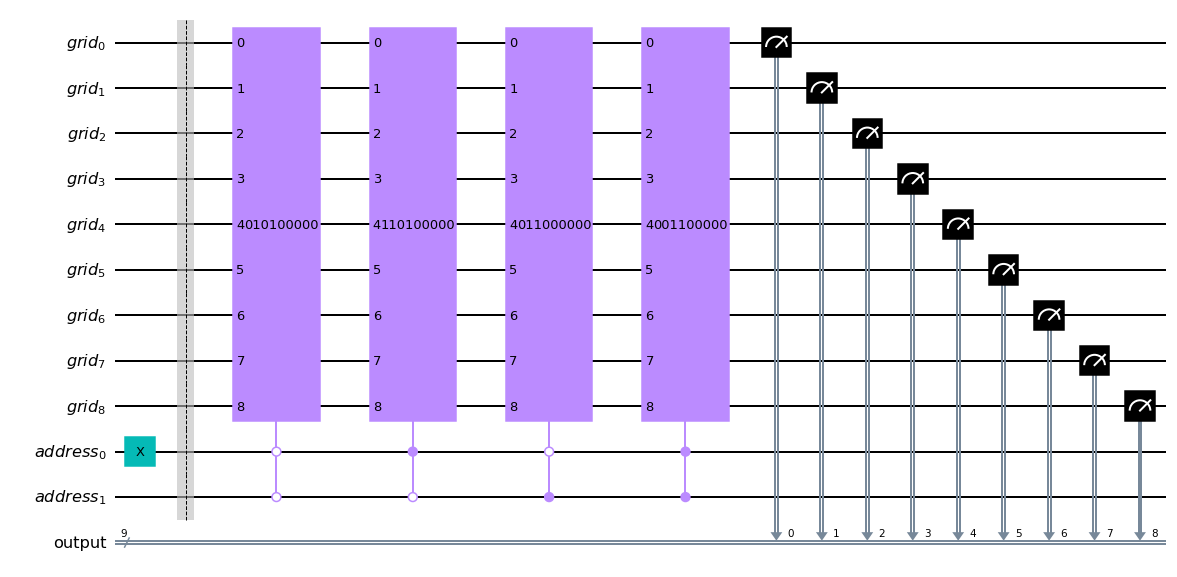

In [5]:
c_output = ClassicalRegister(9, name='output')
tester = QuantumCircuit(q_grid, q_address, c_output)

# give me the in '01', rememeber that the 1 is in the position 0 and the 0 is in the position 1
tester.x(q_address[0])
tester.barrier()

tester.compose(problem, inplace=True)
tester.measure(q_grid, c_output)
tester.draw('mpl')

In [6]:
job = execute(tester, backend=Aer.get_backend('qasm_simulator'), shots=1)
result = job.result()
count =result.get_counts()
print(str(*count.keys())[::-1]) # the result is reversed too

110100000


the position '01' is the grid '110100000'. That matches the info in the setting! 

#### Now the gate "problem" is equivalent to the gate qRAM in circuit_ex.png

In [7]:
problem_gate = problem.to_gate()